In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB
None
          Density     BodyFat         Age      Weight      Height        Neck  \
count  252.000000  252.000000  252.000000  252.000000  252.000000  252.000000   
mean     1.055574   19.150794 

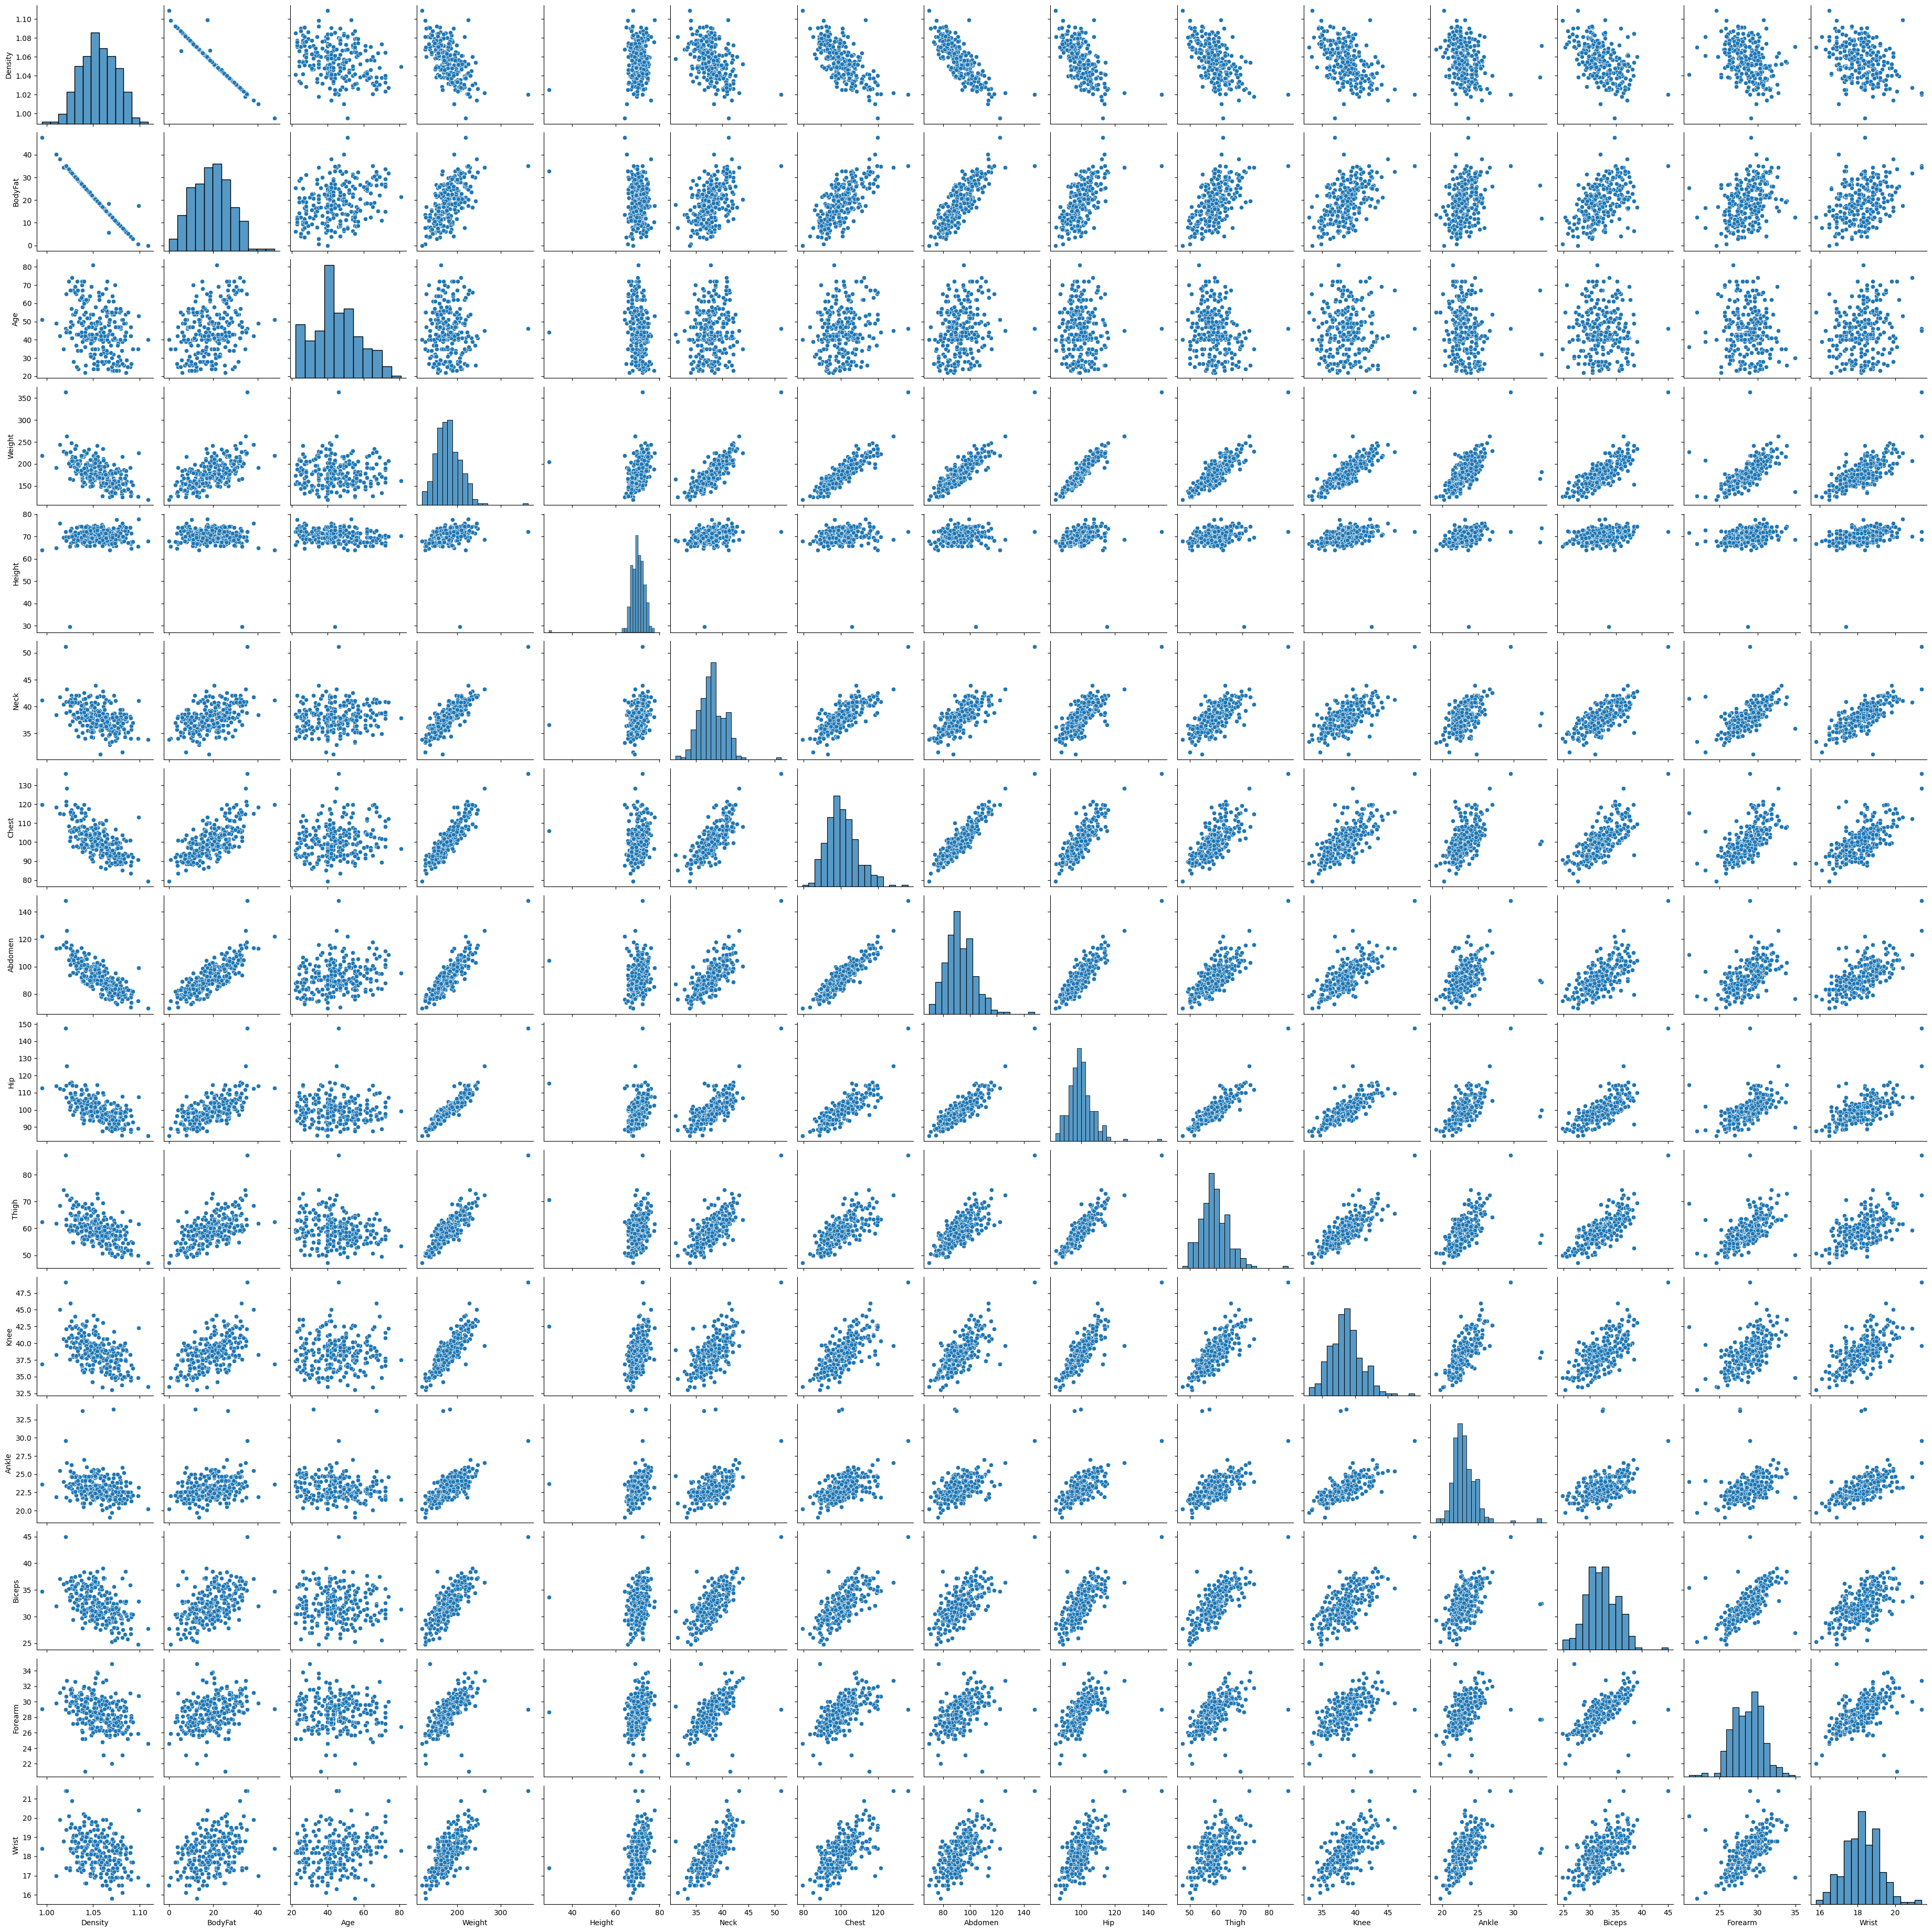

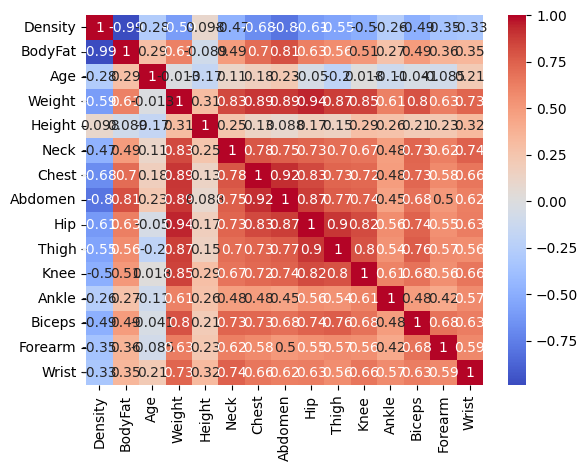

In [5]:
data='https://raw.githubusercontent.com/vishalmaurya850/AI-Code/master/ML/Projects/Body%20Fat%20Prediction/DataSet/bodyfat.csv'
df = pd.read_csv(data)
# Exploratory Data Analysis
print(df.info())
print(df.describe())
sns.pairplot(df)
plt.show()
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [6]:
# Handle missing values if any
df = df.dropna()

# Feature and target selection
X = df.drop('BodyFat', axis=1)
y = df['BodyFat']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [7]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

# Train and evaluate models
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MAE': mae, 'MSE': mse, 'R2 Score': r2}
    print(f'{name} - MAE: {mae}, MSE: {mse}, R2 Score: {r2}')

# Compare models
results_df = pd.DataFrame(results).T
print(results_df)


Linear Regression - MAE: 0.4595308051303821, MSE: 0.38031220947724453, R2 Score: 0.9918244198502373
Decision Tree - MAE: 0.4980392156862749, MSE: 1.9176470588235304, R2 Score: 0.9587762979003004
Random Forest - MAE: 0.16776470588235307, MSE: 0.07135023529411857, R2 Score: 0.9984661823816982
Gradient Boosting - MAE: 0.19953955507105645, MSE: 0.08753088038724459, R2 Score: 0.9981183466889774
                        MAE       MSE  R2 Score
Linear Regression  0.459531  0.380312  0.991824
Decision Tree      0.498039  1.917647  0.958776
Random Forest      0.167765  0.071350  0.998466
Gradient Boosting  0.199540  0.087531  0.998118


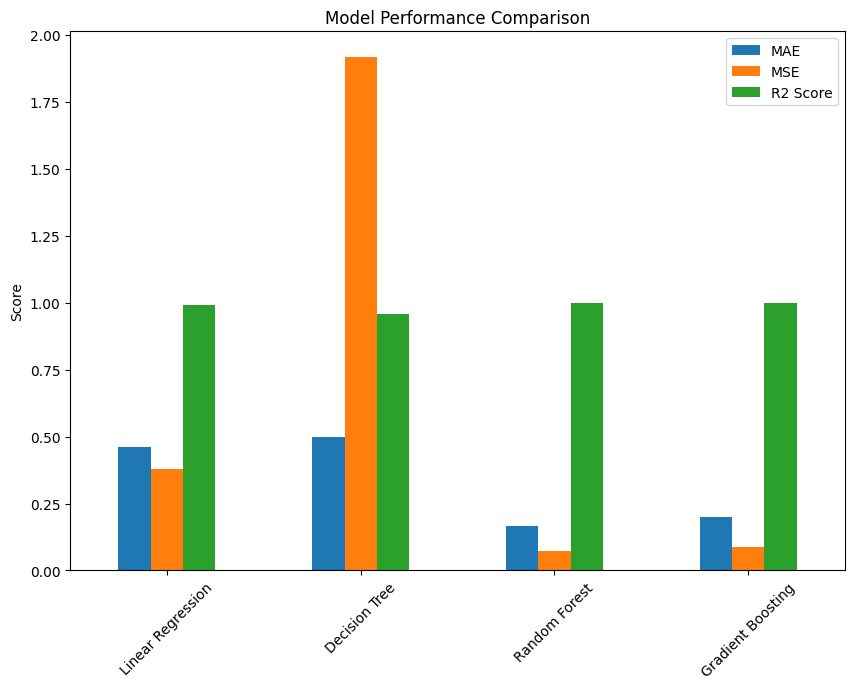

In [8]:
# Plotting the performance of models
results_df.plot(kind='bar', figsize=(10, 7))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()